In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tweepy
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

analyser = SentimentIntensityAnalyzer()

In [2]:
import tweepy

auth = tweepy.OAuthHandler('UGxquWoEO6bisCK6FGhBlrKYp', 'dRw1GVeyzgdfYQD1S4aEZRGaGCep9QusVZWI9gt4uHriOZG4WI')
auth.set_access_token('333368932-TP9Vp0cWTZ8FywrhtYj3kSvDjhcSPuISON7ROh4f', 'k42e1QG5t72HiDzi4M7WxRfTUvUodZLKFT6268Eb6mLzw')

api = tweepy.API(auth)

public_tweets = api.home_timeline()
# for tweet in public_tweets:
#     print(tweet.text)

In [3]:
def daily_tweets(search_name, since_date, until_date,value):
    clean_tweet = []
    plug = value
    for i in range(75):
        all_tweets = api.search(q='@'+search_name,lang = 'en', count = 100, since = since_date, until = until_date,max_id = plug)
        for tweet in all_tweets:
            plug = str(tweet.id - 1)
            if 'RT' not in tweet.text: 
                empty = {}
                empty['t_id'] = tweet.id
                empty['text'] = tweet.text
                empty['time_stamp'] = tweet.created_at
                clean_tweet.append(empty)
    return clean_tweet


In [4]:
def add_polarity(dataframe):
    polarities = []
    neg_pos = []
    for item in list(dataframe.text):
        sentiment = analyser.polarity_scores(item)
        polarities.append(sentiment['compound'])
        if sentiment['compound'] > 0:
            neg_pos.append('pos')
        elif sentiment['compound'] < 0:
            neg_pos.append('neg')
        elif sentiment['compound'] == 0:
            neg_pos.append('neutral')
    dataframe['vader_sentiment'] = polarities
    dataframe['sentiment'] = neg_pos

In [5]:
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
stock = TimeSeries(key='1250F9WWA3Z77BIK')
# Get json object with the intraday data and another with  the call's met/adata
data, meta_data = stock.get_intraday(symbol ='FB', interval='1min')

In [9]:
x = daily_tweets('facebook', '2018-08-29', '2018-08-30',None)

In [10]:
df = pd.DataFrame(x)
add_polarity(df)

In [13]:
df.to_csv('tweets_8_29_final.csv',index=False)

In [16]:
sun_wed_tweets_df = pd.read_csv('tweets.csv')

In [33]:
running_tweets = pd.read_csv('tweets_8_28.csv')

In [34]:
final_wed = pd.read_csv('tweets_8_29_final.csv')

In [46]:
final_wed = final_wed[(final_wed.time_stamp > '2018-08-29 20:03:44')]

In [47]:
running_tweets = running_tweets.append(final_wed)

In [3]:
# d2 = running_tweets[(ts.index > '2018-08-25')]

In [51]:
ts = d2.set_index('time_stamp')
ts.index = pd.to_datetime(ts.index)
ts =ts.drop(['text','t_id','sentiment'],axis=1)


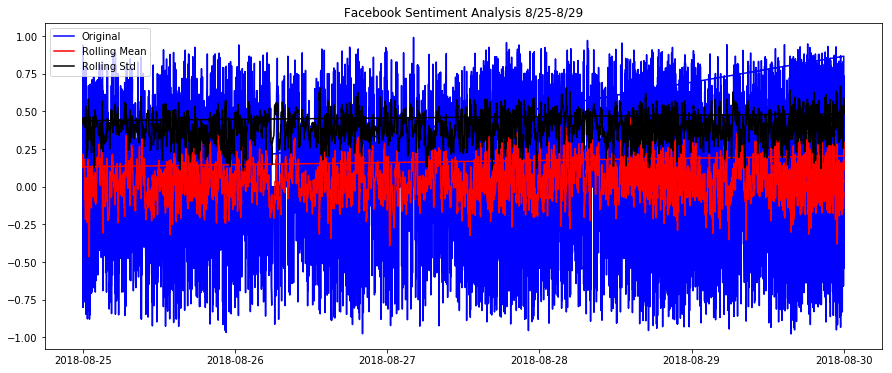

In [100]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

rolmean = ts.rolling(window=12).mean()
rolstd = ts.rolling(window=12).std()
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Facebook Sentiment Analysis 8/25-8/29')
plt.show(block=False)

In [76]:
running_stocks_thirty = pd.read_csv('stock.csv')
running_stocks_thirty = running_stocks_thirty.set_index('Unnamed: 0')
running_stocks_thirty.index = pd.to_datetime(running_stocks_thirty.index)

In [78]:
wed_stock = pd.read_csv('8.28_stock.csv')
wed_stock = wed_stock.set_index('Unnamed: 0')
wed_stock.index = pd.to_datetime(wed_stock.index)

In [80]:
running_stocks_fifteen = pd.read_csv('8.24_8.28_stock.csv')
running_stocks_fifteen = running_stocks_fifteen.set_index('Unnamed: 0')
running_stocks_fifteen.index = pd.to_datetime(running_stocks_fifteen.index)

In [82]:
tsfb =running_stocks_fifteen.drop(['1. open','2. high','3. low','5. volume'],axis=1)
tsfb.index = pd.to_datetime(tsfb.index)

In [83]:
tsfb['4. close'] = tsfb['4. close'].astype(float)

In [84]:
type(tsfb['4. close'])

pandas.core.series.Series

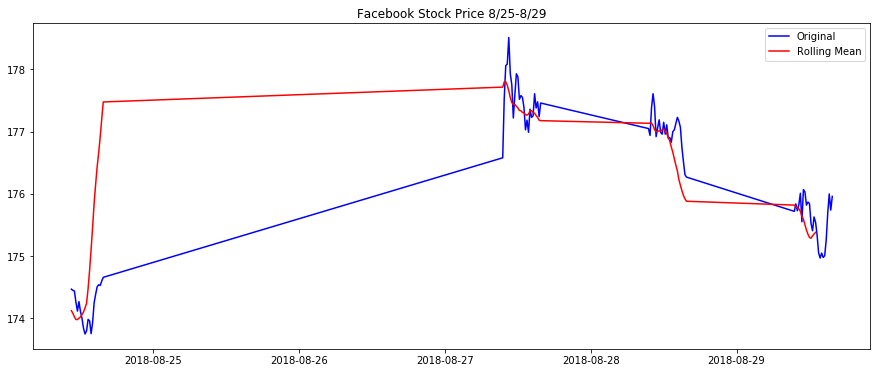

In [86]:
rolmeanfb = tsfb.rolling(window=12).mean()
# rolstdfb = tsfb.rolling(window=12).std()
orig = plt.plot(tsfb, color='blue',label='Original')
mean = plt.plot(rolmeanfb, color='red', label='Rolling Mean')
# std = plt.plot(rolstdfb, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Facebook Stock Price 8/25-8/29')
plt.show(block=False)

In [115]:
tweets_wed = ts[((ts.index > '2018-08-29') & (ts.index< '2018-08-30'))]

In [91]:
weds_df = wed_stock[(wed_stock.index>'2018-08-29')]
weds_df =weds_df.drop(['1. open','2. high','3. low','5. volume'],axis=1)
weds_df.index = pd.to_datetime(weds_df.index)
weds_df['4. close'] = weds_df['4. close'].astype(float)

In [118]:
tweets_tues = ts[((ts.index > '2018-08-28') & (ts.index< '2018-08-29'))]

In [119]:
tues_df = running_stocks_fifteen[((running_stocks_fifteen.index>'2018-08-28') & (running_stocks_fifteen.index < '2018-08-29'))]
tues_df =tues_df.drop(['1. open','2. high','3. low','5. volume'],axis=1)
tues_df.index = pd.to_datetime(tues_df.index)
tues_df['4. close'] = tues_df['4. close'].astype(float)

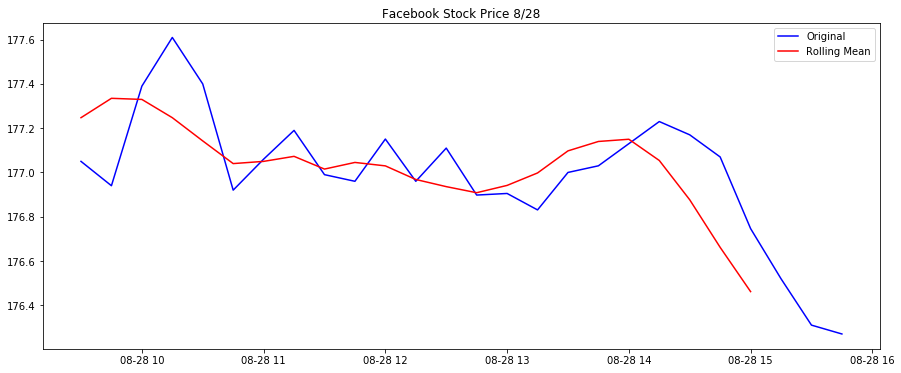

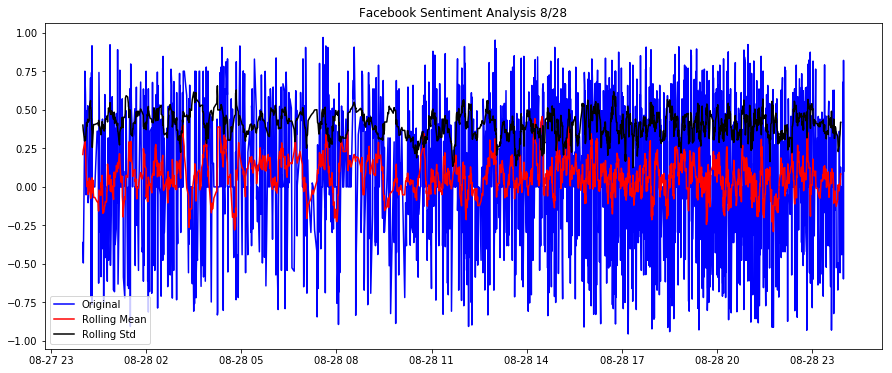

In [133]:
rolmean_tuesstock = tues_df.rolling(window=4).mean()
# rolstdfb = tsfb.rolling(window=12).std()
orig = plt.plot(tues_df, color='blue',label='Original')
mean = plt.plot(rolmean_tuesstock, color='red', label='Rolling Mean')
# std = plt.plot(rolstdfb, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Facebook Stock Price 8/28')
plt.show(block=False)
rolmean_tweettues = tweets_tues.rolling(window=12).mean()
rolstd_tweettues = tweets_tues.rolling(window=12).std()
orig = plt.plot(tweets_tues, color='blue',label='Original')
mean = plt.plot(rolmean_tweettues, color='red', label='Rolling Mean')
std = plt.plot(rolstd_tweettues, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Facebook Sentiment Analysis 8/28')
plt.show(block=False)

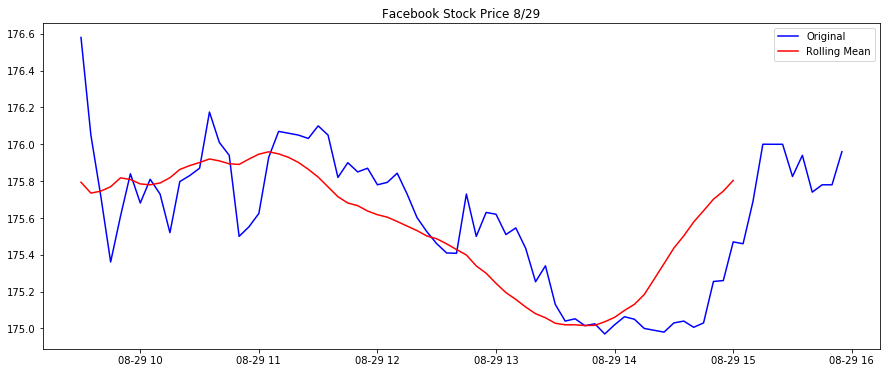

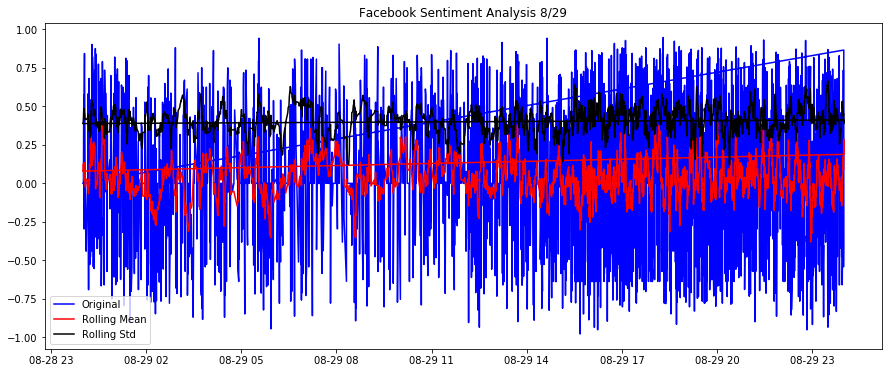

In [129]:
rolmean_wedstock = weds_df.rolling(window=1).mean()
# rolstdfb = tsfb.rolling(window=12).std()
orig = plt.plot(weds_df, color='blue',label='Original')
mean = plt.plot(rolmean_wedstock, color='red', label='Rolling Mean')
# std = plt.plot(rolstdfb, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Facebook Stock Price 8/29')
plt.show(block=False)
rolmean_tweetwed = tweets_wed.rolling(window=12).mean()
rolstd_tweetwed = tweets_wed.rolling(window=12).std()
orig = plt.plot(tweets_wed, color='blue',label='Original')
mean = plt.plot(rolmean_tweetwed, color='red', label='Rolling Mean')
std = plt.plot(rolstd_tweetwed, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Facebook Sentiment Analysis 8/29')
plt.show(block=False)